In [13]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel
from sklearn.metrics import r2_score

In [6]:
X, y = load_boston(return_X_y = True)
X.shape

(506, 13)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [4]:
kernel = ConstantKernel(1.) + ConstantKernel(1.) * RBF(10.) + WhiteKernel(5.)
model = GaussianProcessRegressor(kernel = kernel)
model

GaussianProcessRegressor(kernel=1**2 + 1**2 * RBF(length_scale=10) + WhiteKernel(noise_level=5))

In [11]:
model.fit(X_train, y_train)
model.kernel_

211**2 + 316**2 * RBF(length_scale=257) + WhiteKernel(noise_level=8.14)

In [12]:
y_pred_tr, std_pred_tr = model.predict(X_train, return_std = True)
y_pred_ts, std_pred_ts = model.predict(X_test , return_std = True)
y_pred_ts

array([34.74013103, 34.19965317, 13.87217142, 21.63389414, 40.83169512,
       15.79463908, 17.99887732, 21.16898085, 15.50273711, 27.18900608,
       26.10932327, 18.71603821, 17.64433406, 23.9843336 , 25.02005898,
       23.84474773, 31.81967965, 17.52720192, 43.36197261, 20.56103982,
       26.67684395, 12.41255255, 36.91089964, 23.43810506,  8.52035217,
       13.01719824, 12.98583752, 23.9100436 , 16.58957689, 16.62522948,
       23.40897066,  7.96622214, 24.34811555, 18.06884623, 32.28906726,
       22.16457509,  8.59515163, 22.31914114, 31.13732689, 42.58972741,
       26.18621118, 22.87918187, 13.56724046, 17.02875289, 20.17875717,
       22.51801629, 33.29758979, 25.53278085, 25.34312134, 21.19205629,
       23.45529968, 18.44402452, 29.91029481, 10.98377132, 21.07025196,
       21.09731883, 16.71357971, 43.18536884, 15.45121408, 21.25827302,
       10.36318344, 19.52788233, 22.34037106, 32.41703076, 13.62341637,
       38.6898146 , 14.58892886, 34.25358193, 26.46580173, 21.15

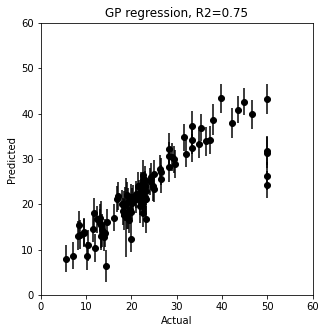

In [18]:
fig, sub = plt.subplots(figsize = (5, 5))
sub.set_aspect("equal")
sub.errorbar(y_test, y_pred_ts, yerr = std_pred_ts, fmt = "o", color = "k")
sub.set_title(f"GP regression, R2={r2_score(y_test, y_pred_ts):.2f}")
sub.set_xlabel("Actual")
sub.set_ylabel("Predicted")
sub.set_xlim(0, 60)
sub.set_ylim(0, 60)
plt.show()